In [69]:
#Jesus saves!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,7)

In [50]:
df=pd.read_csv('C:\\Users\\chris\\Downloads\\Car prediction\\scrap price.csv')

In [51]:
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [52]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [53]:
df.price.value_counts()

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

In [54]:
numerical_features= [i for i in df.columns if df[i].dtypes !='O']
print('numerical features', len(numerical_features))
numerical_features

numerical features 16


['ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [55]:
categorical_features= [i for i in df.columns if df[i].dtypes=='O']
print(categorical_features, len(categorical_features))
categorical_features

['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 10


['name',
 'fueltypes',
 'aspiration',
 'doornumbers',
 'carbody',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [56]:
num_categorical= [i for i in numerical_features if len(df[i].unique())<15]
print('num_categorical',len(num_categorical) )
num_categorical

num_categorical 1


['symboling']

In [57]:
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

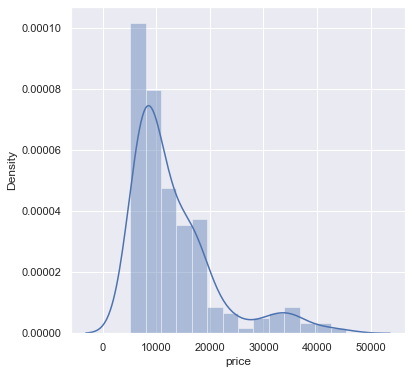

In [58]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show



<AxesSubplot:>

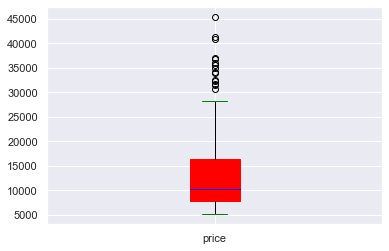

In [59]:
price=df['price']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
price.plot.box(color=props2,patch_artist=True,vert=True)

In [60]:
price_IQR = df.price.describe()['75%']-df.price.describe()['25%']
price_uplim= df.price.describe()['75%']+1.5*price_IQR

In [61]:
price_lolim = df.price.describe()['25%']-1.5*price_IQR

In [62]:
len(df.price[df.price>price_uplim])

15

In [63]:
df.price = np.where(df.price>price_uplim,price_uplim,df.price)

<AxesSubplot:xlabel='price'>

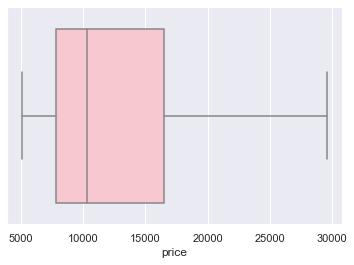

In [64]:
sns.boxplot(data=df, x='price', color='pink')

<AxesSubplot:>

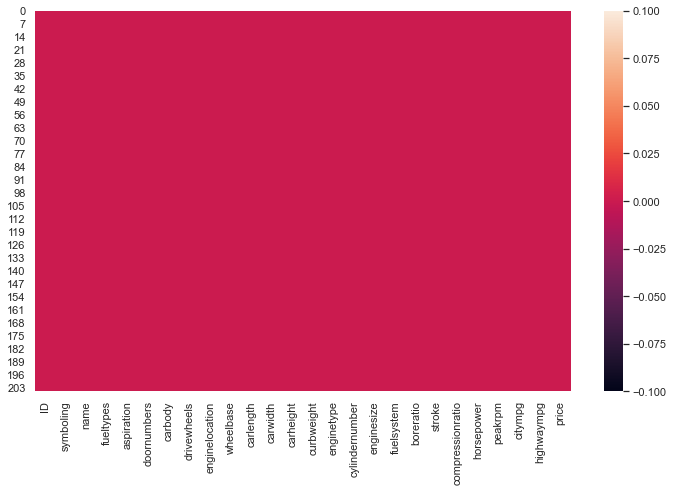

In [75]:
sns.heatmap(df.isnull(), cmap='rocket')

In [76]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [91]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

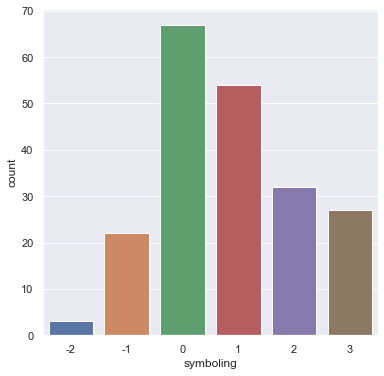

In [98]:
sns.set()
plt.figure(figsize =(6,6))
sns.countplot(df['symboling'])
plt.show()

In [104]:
df.columns


Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [106]:
df.fueltypes.value_counts()

gas       185
diesel     20
Name: fueltypes, dtype: int64

Text(0.5, 1.0, 'barplot of fueltypes')

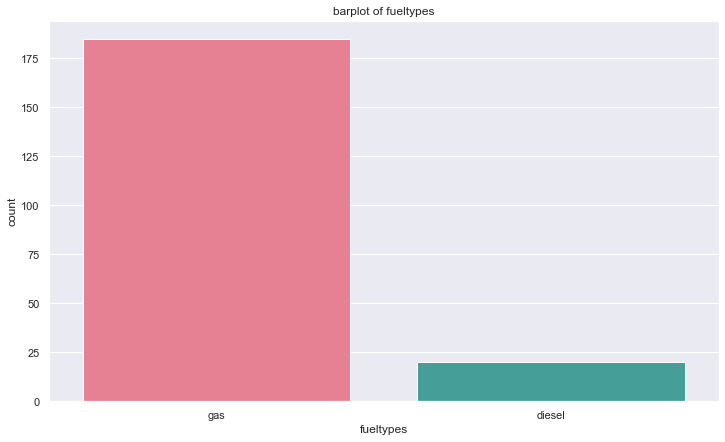

In [114]:
sns.countplot(data=df, x='fueltypes',  palette= 'husl')
plt.title('barplot of fueltypes')

In [115]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [117]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='count'>

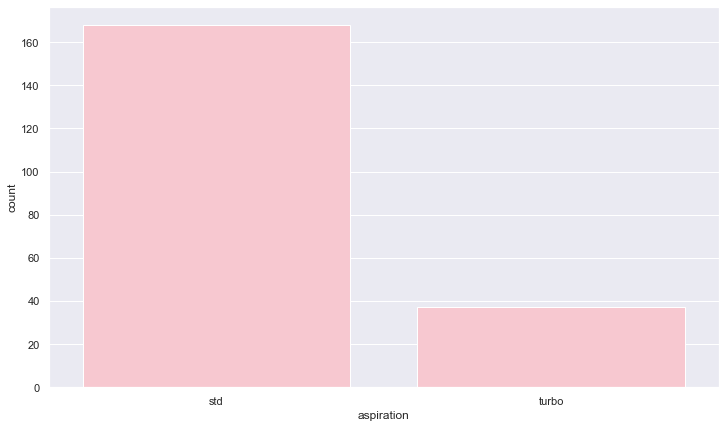

In [118]:
sns.countplot(data=df, x='aspiration', color='pink')

In [121]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [122]:
df.doornumbers.value_counts()

four    115
two      90
Name: doornumbers, dtype: int64

<AxesSubplot:xlabel='doornumbers', ylabel='count'>

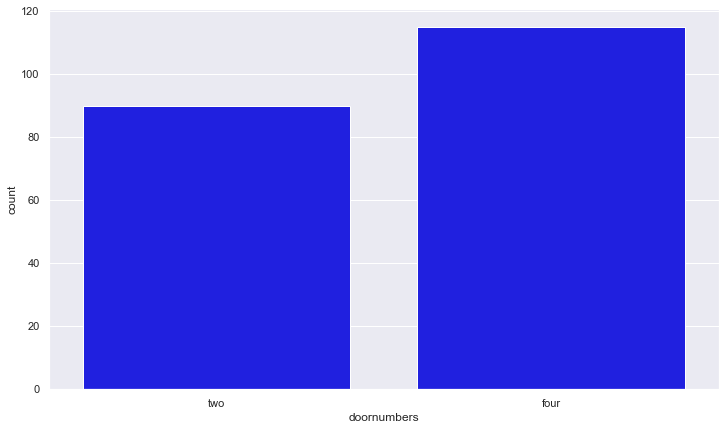

In [123]:
sns.countplot(data=df, x='doornumbers', color='blue')

In [130]:

df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='carbody', ylabel='count'>

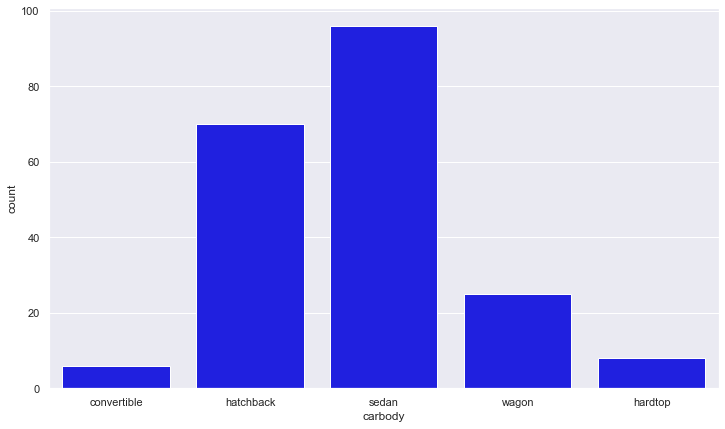

In [132]:
sns.countplot(data=df, x='carbody', color='blue')

In [133]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<AxesSubplot:xlabel='drivewheels', ylabel='count'>

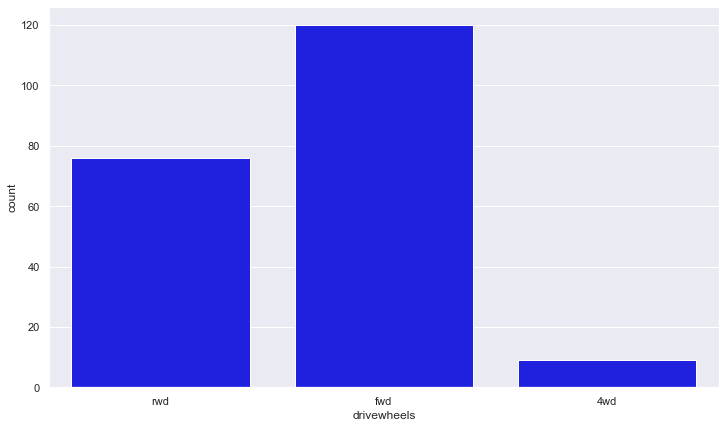

In [134]:
sns.countplot(data=df, x='drivewheels', color='blue')

In [135]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

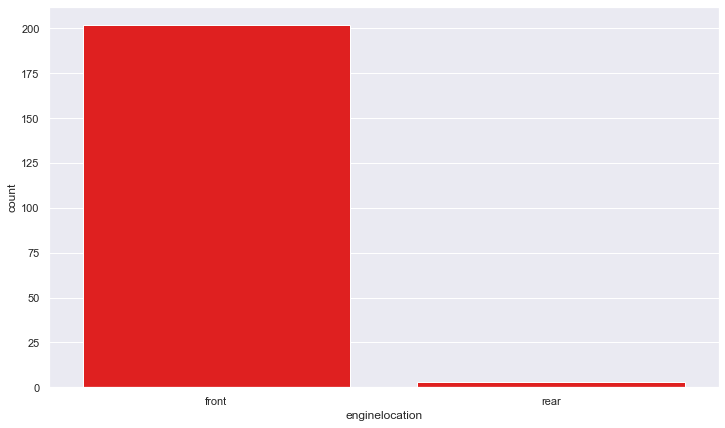

In [136]:
sns.countplot(data=df, x='enginelocation', color='red')

In [137]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

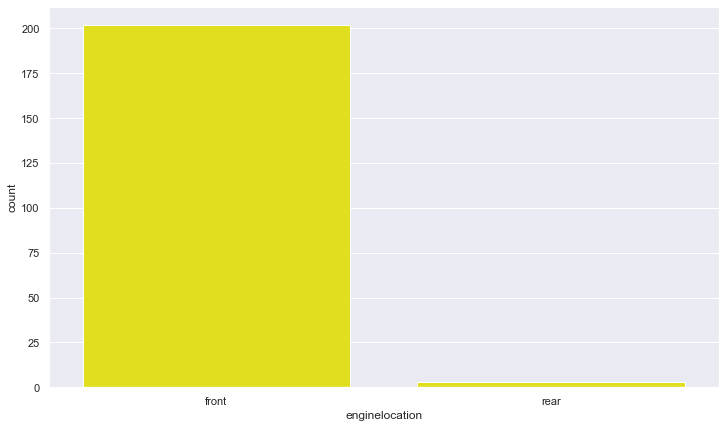

In [138]:
sns.countplot(data=df, x='enginelocation', color='Yellow')

In [139]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

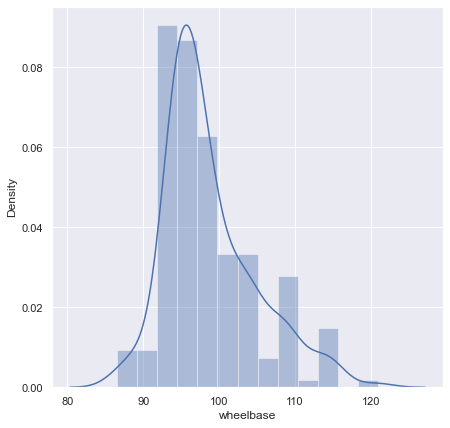

In [144]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df['wheelbase'])
plt.show()

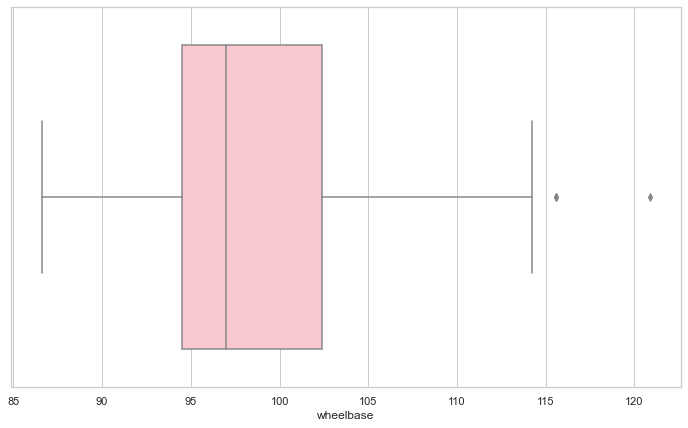

In [146]:
sns.set_style('whitegrid')
sns.boxplot(df.wheelbase, color='pink')
plt.show()

In [147]:
IQR= df.wheelbase.quantile (.75) - df.wheelbase.quantile(.25)
IQR

7.900000000000006

In [149]:
UL= df.wheelbase.quantile(.75)+(1.5*IQR)
UL

114.25000000000001

In [150]:
LOLM= df.wheelbase.quantile(.25)-(1.5*IQR)
LOLM

82.64999999999999

In [153]:
len(df[df.wheelbase<LOLM])

0

In [158]:
len(df[df.wheelbase>UL])

0

In [160]:
df['wheelbase']= np.where(df['wheelbase']>UL,UL,df['wheelbase'])

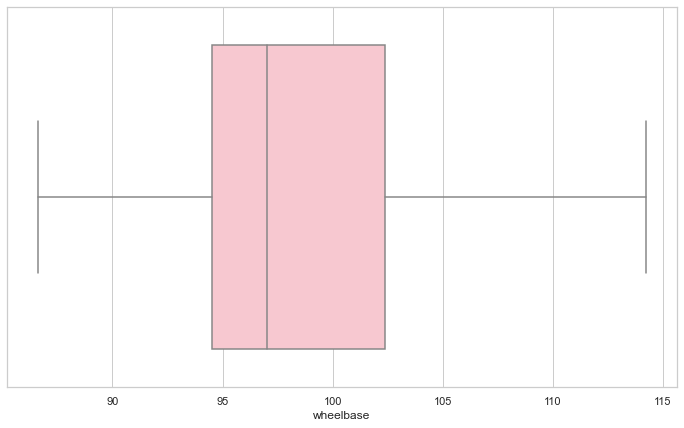

In [161]:
sns.set_style('whitegrid')
sns.boxplot(df.wheelbase, color='pink')
plt.show()

In [162]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

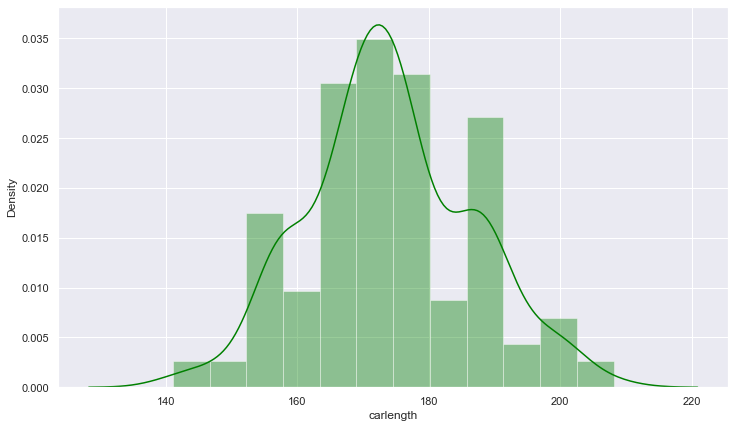

In [169]:
sns.set()

sns.distplot(df['carlength'],color='green')
plt.show()

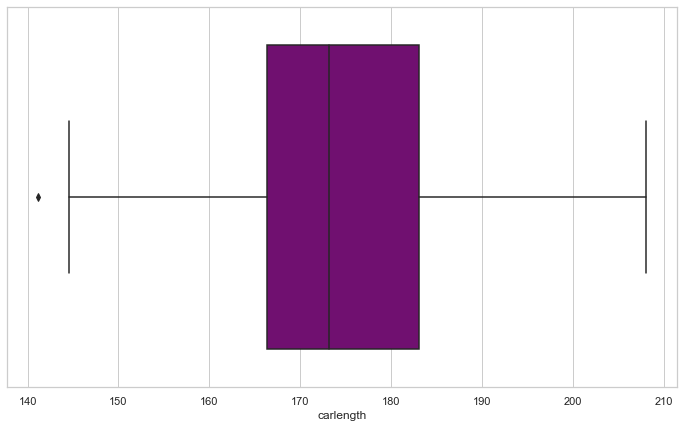

In [179]:
sns.set_style('whitegrid')
sns.boxplot(df.carlength, color='purple')

plt.show()

In [180]:
IQR= df.carlength.quantile(.75)-df.carlength.quantile(.25)
IQR

16.799999999999983

In [188]:
UL= df.carlength.quantile(.75)+(1.5*IQR)
UL

208.29999999999995

In [189]:
LL= df.carlength.quantile(.25)-(1.5*IQR)
LL

141.10000000000002

In [196]:
len(df[df.carlength>UL])

0

In [197]:
len(df[df.carlength<LL])

1

In [199]:
df['carlength']= np.where(df['carlength']<LL,LL,df.carlength)

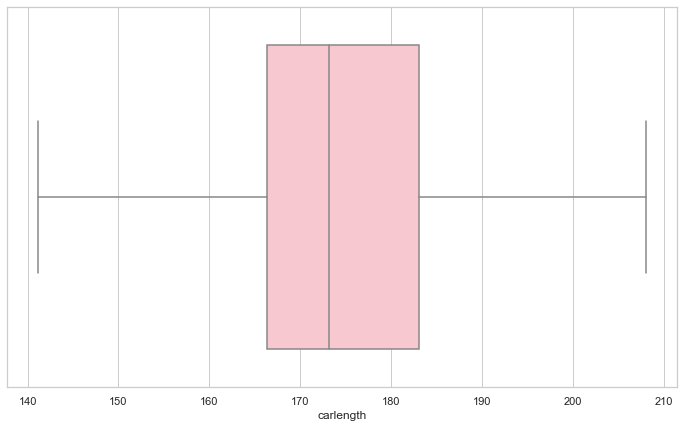

In [200]:
sns.set_style()
sns.boxplot(df.carlength, color='pink')
plt.show()

In [201]:
len(df[df.carlength<IQR])

0

In [202]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [203]:
df.carwidth.value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

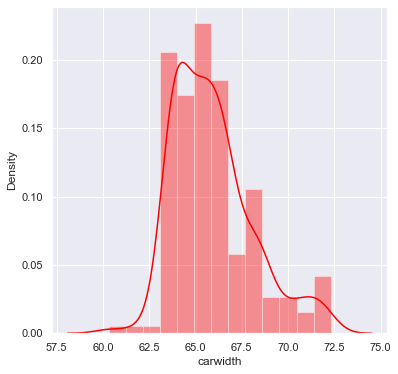

In [204]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df.carwidth, color='red')

<AxesSubplot:xlabel='carwidth'>

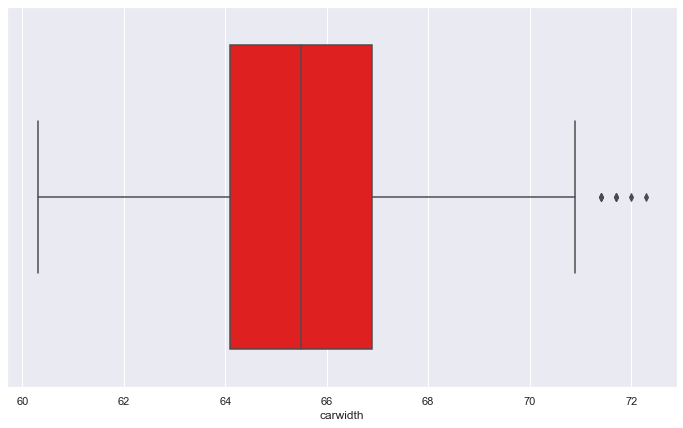

In [205]:
sns.set_style()
sns.boxplot(df.carwidth, color='red')

In [206]:
IQR= df.carwidth.quantile(.75)-df.carwidth.quantile(.25)
IQR

2.8000000000000114

In [207]:
UL=df.carwidth.quantile(.75)+(1.5*IQR)
UL

71.10000000000002

In [208]:
LLM=df.carwidth.quantile(.25)-(1.5*IQR)
LLM

59.89999999999998

In [209]:
len(df[df.carwidth>UL])

8

In [210]:
len(df[df.carwidth<LLM])

0

In [212]:
df['carwidth']=np.where(df['carwidth']>UL,UL,df.carwidth)

<AxesSubplot:xlabel='carwidth'>

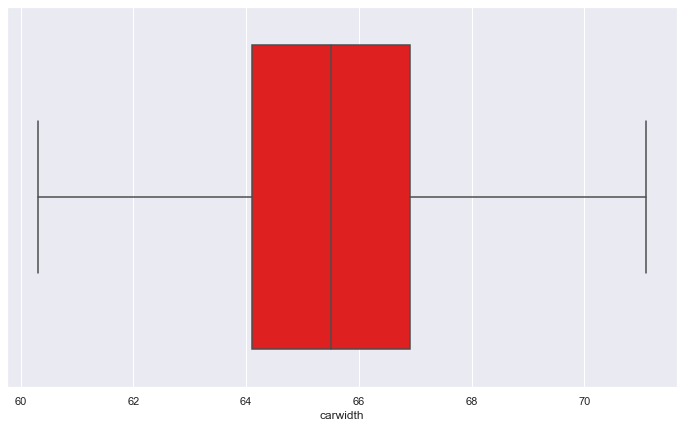

In [214]:
sns.set_style()
sns.boxplot(df.carwidth, color='red')

In [215]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [216]:
df.carheight.value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64

<AxesSubplot:xlabel='carheight', ylabel='Density'>

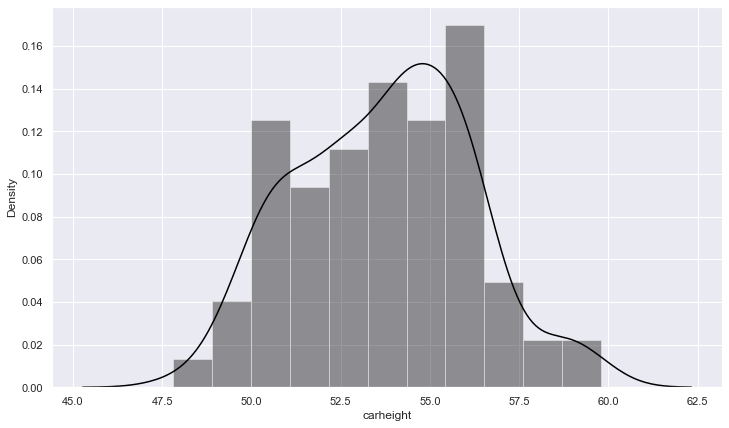

In [217]:
sns.set()
sns.distplot(df.carheight, color='black')

<AxesSubplot:xlabel='carheight'>

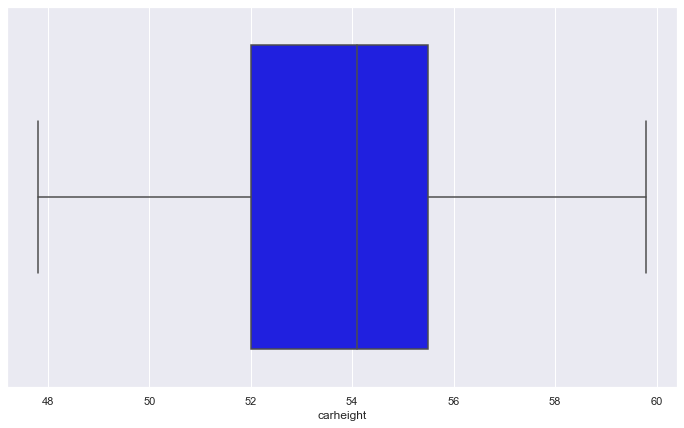

In [219]:
sns.set_style()
sns.boxplot(df.carheight, color='blue')

In [221]:
IQR= df.carheight.quantile(.75)-df.carheight.quantile(.25)
IQR

3.5

In [229]:
UL=df.carheight.quantile(.75)+(1.5+IQR)
UL

60.5

In [230]:
len(df[df.carheight>UL])

0

In [232]:
df.curbweight.value_counts()


2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

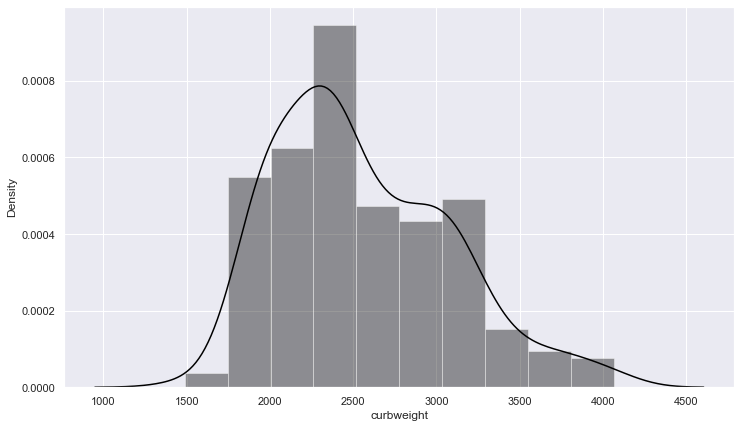

In [233]:
sns.set()
sns.distplot(df.curbweight, color='black')

<AxesSubplot:xlabel='curbweight'>

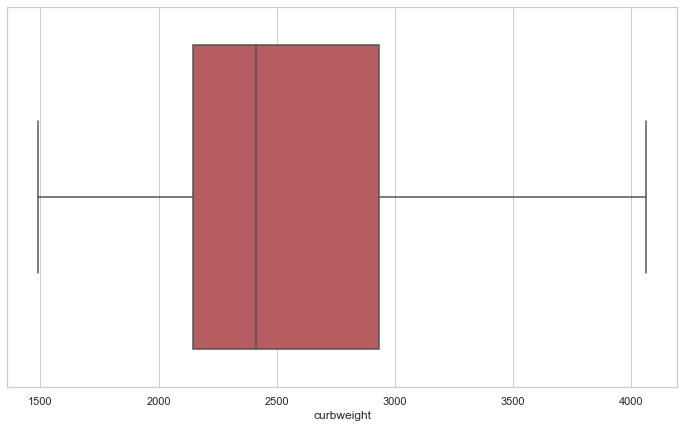

In [234]:
sns.set_style('whitegrid')
sns.boxplot(df.curbweight, color='r')